<a href="https://colab.research.google.com/github/yujeonghyeop/Bitcoin-Anomaly-Transaction-Detection/blob/main/%08Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve,roc_auc_score,fbeta_score,recall_score
from sklearn.metrics import plot_precision_recall_curve,average_precision_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.svm import SVC


In [ ]:
raw_features=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_features.csv")
raw_classes=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_classes.csv")
raw_edgelist=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_edgelist.csv")

In [ ]:
raw_features.columns = ['id', 'time'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]


In [ ]:
raw_features = pd.merge(raw_features, raw_classes, left_on='id', right_on='txId', how='left')
raw_features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,txId,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,5530458,unknown
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,232022460,unknown
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,232438397,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,230460314,unknown
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,230459870,unknown


In [ ]:
data = raw_features.copy()
data.pop('txId')
data.pop('time')
data.pop('id')
mask = data['class'].isin(['unknown'])
data = data[~mask]
data

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
8,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
9,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
15,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203751,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,-0.049707,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,2
203753,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,-0.049707,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,2
203758,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,-0.032993,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203762,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,-0.089510,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2


In [ ]:
data1 = data.copy()
data1.pop('class')
data1

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
8,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
9,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
10,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
15,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203751,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,-0.049707,...,1.793987,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035
203753,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,-0.049707,...,-0.577099,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792
203758,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,-0.032993,...,1.709623,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203762,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,-0.089510,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
data1_scale = scaler.fit_transform(data1)

In [ ]:
df = pd.DataFrame(data1_scale)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,0.008409,0.029460,0.250,0.254962,0.000000,0.180982,0.280822,1.578324e-08,0.001330,0.000493,...,0.000000,0.001481,0.5,0.5,0.021956,0.000839,0.000000,0.010886,0.5,0.5
1,0.004203,0.010697,0.375,0.091603,0.000000,0.087423,0.020548,1.578324e-08,0.000618,0.000369,...,0.000000,0.001481,0.5,0.5,0.013972,0.000534,0.000000,0.006928,0.5,0.5
2,0.000629,0.000351,0.125,0.000000,0.000076,0.000000,0.000000,6.289040e-04,0.000629,0.000000,...,0.000000,0.001481,0.5,0.5,0.003992,0.000153,0.000000,0.001979,0.5,0.5
3,0.000541,0.000351,0.125,0.000000,0.000076,0.000000,0.000000,5.412090e-04,0.000541,0.000000,...,0.007396,0.005185,0.0,0.0,0.003992,0.000153,0.000000,0.001979,0.5,0.5
4,0.000017,0.000351,0.125,0.003053,0.000076,0.001534,0.006849,1.551347e-07,0.000009,0.000013,...,0.000000,0.002963,0.5,0.5,0.003992,0.000229,0.000195,0.002474,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data1)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data1['cluster'] = model.fit_predict(data1)

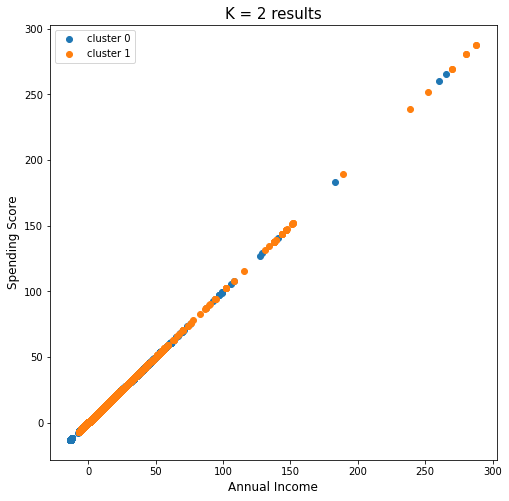

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(data1.loc[data1['cluster'] == i], data1.loc[data1['cluster'] == i], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

In [ ]:
data2 = data.copy()
data2

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
8,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
9,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
15,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203751,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,-0.049707,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,2
203753,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,-0.049707,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,2
203758,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,-0.032993,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203762,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,-0.089510,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2


In [ ]:
data2.pop('agg_feat_17')
data2.pop('agg_feat_58')
data2.pop('agg_feat_59')
data2.pop('agg_feat_35')
data2.pop('agg_feat_16')
data2.pop('agg_feat_34')
data2.pop('agg_feat_42')
data2.pop('agg_feat_22')
data2.pop('agg_feat_52')
data2.pop('agg_feat_23')
data2.pop('agg_feat_53')
data2.pop('agg_feat_28')
data2.pop('agg_feat_11')
data2.pop('agg_feat_29')
data2.pop('agg_feat_10')
data2.pop('agg_feat_7')
data2.pop('agg_feat_66')
data2.pop('agg_feat_41')
data2.pop('agg_feat_9')
data2.pop('agg_feat_40')
data2.pop('agg_feat_5')
data2.pop('agg_feat_4')
data2.pop('agg_feat_45')
data2.pop('agg_feat_6')
data2.pop('agg_feat_21')
data2.pop('agg_feat_65')
data2.pop('agg_feat_64')
data2.pop('agg_feat_67')
data2.pop('agg_feat_46')
data2.pop('trans_feat_6')
data2.pop('trans_feat_38')
data2.pop('trans_feat_37')
data2.pop('trans_feat_69')
data2.pop('trans_feat_14')
data2.pop('trans_feat_72')
data2.pop('trans_feat_56')
data2.pop('trans_feat_71')
data2.pop('trans_feat_55')
data2.pop('trans_feat_49')
data2.pop('trans_feat_43')
data2.pop('trans_feat_50')
data2.pop('trans_feat_87')
data2.pop('trans_feat_15')
data2.pop('trans_feat_13')
data2.pop('trans_feat_4')
data2.pop('trans_feat_44')
data2.pop('trans_feat_33')
data2.pop('trans_feat_36')
data2.pop('trans_feat_35')
data2.pop('trans_feat_70')
data2.pop('trans_feat_2')
data2.pop('trans_feat_34')
data2.pop('trans_feat_32')
data2.pop('trans_feat_26')
data2.pop('trans_feat_63')
data2.pop('trans_feat_57')
data2.pop('trans_feat_25')
data2.pop('trans_feat_31')
data2.pop('trans_feat_12')
data2.pop('trans_feat_9')
data2.pop('trans_feat_81')
data2.pop('trans_feat_75')
data2

,trans_feat_0,trans_feat_1,trans_feat_3,trans_feat_5,trans_feat_7,trans_feat_8,trans_feat_10,trans_feat_11,trans_feat_16,trans_feat_17,...,agg_feat_56,agg_feat_57,agg_feat_60,agg_feat_61,agg_feat_62,agg_feat_63,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
2,0.163054,1.963790,12.409294,9.782742,-0.163645,-0.115831,-0.163905,1.059993,0.174329,-0.172908,...,-1.059868,-1.071885,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,0.677799,-0.120613,-0.119792
8,-0.005027,0.578941,4.380281,4.667146,-0.163645,-0.144554,-0.163135,1.696691,0.001525,-0.172908,...,-1.059868,-1.071885,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,0.333211,-0.120613,-0.119792
9,-0.147852,-0.184668,-0.121970,-0.113002,-0.137933,-0.144108,-0.140266,-0.028741,-0.148916,-0.151494,...,-1.059868,-1.678997,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,-0.097524,-0.120613,-0.119792
10,-0.151357,-0.184668,-0.121970,-0.113002,-0.141519,-0.147643,-0.143847,-0.028741,-0.150266,-0.150457,...,-1.059868,-1.678997,-0.216814,-0.587217,-0.539735,-0.582077,-0.131155,-0.097524,-0.120613,-0.119792
15,-0.172306,-0.184668,0.028105,-0.029140,-0.163640,-0.169115,-0.165719,-2.222844,-0.170460,-0.172121,...,-1.059868,-1.678997,-0.193143,-0.611769,-0.577099,-0.600999,-0.084674,-0.054450,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203751,-0.159293,-0.037276,-0.121970,-0.113002,-0.149635,-0.155646,-0.151955,-0.028741,-0.161423,-0.166686,...,0.951793,1.053007,-0.216814,3.132493,1.793987,1.408971,3.168259,3.707301,-1.390548,-1.214035
203753,-0.172962,-0.126566,-0.121970,-0.113002,-0.163622,-0.169437,-0.165926,-0.028741,-0.171129,-0.172908,...,-1.059868,1.963675,2.150311,-0.004094,-0.577099,0.647874,-0.131155,7.914145,-0.120613,-0.119792
203758,-0.170412,-0.078164,0.028105,0.054722,-0.163631,-0.167106,-0.165073,2.220787,-0.168569,-0.170013,...,-0.453330,1.660119,0.327624,1.401539,1.709623,1.606604,-0.131155,-0.097524,-0.120613,-0.119792
203762,-0.093732,-0.116160,-0.121970,-0.113002,-0.082559,-0.089510,-0.084953,-0.028741,-0.090105,-0.080260,...,-1.059868,0.749451,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,-0.097524,-0.120613,-0.119792


In [ ]:
data2

,trans_feat_0,trans_feat_1,trans_feat_3,trans_feat_5,trans_feat_7,trans_feat_8,trans_feat_10,trans_feat_11,trans_feat_16,trans_feat_17,...,agg_feat_56,agg_feat_57,agg_feat_60,agg_feat_61,agg_feat_62,agg_feat_63,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
2,0.163054,1.963790,12.409294,9.782742,-0.163645,-0.115831,-0.163905,1.059993,0.174329,-0.172908,...,-1.059868,-1.071885,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,0.677799,-0.120613,-0.119792
8,-0.005027,0.578941,4.380281,4.667146,-0.163645,-0.144554,-0.163135,1.696691,0.001525,-0.172908,...,-1.059868,-1.071885,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,0.333211,-0.120613,-0.119792
9,-0.147852,-0.184668,-0.121970,-0.113002,-0.137933,-0.144108,-0.140266,-0.028741,-0.148916,-0.151494,...,-1.059868,-1.678997,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,-0.097524,-0.120613,-0.119792
10,-0.151357,-0.184668,-0.121970,-0.113002,-0.141519,-0.147643,-0.143847,-0.028741,-0.150266,-0.150457,...,-1.059868,-1.678997,-0.216814,-0.587217,-0.539735,-0.582077,-0.131155,-0.097524,-0.120613,-0.119792
15,-0.172306,-0.184668,0.028105,-0.029140,-0.163640,-0.169115,-0.165719,-2.222844,-0.170460,-0.172121,...,-1.059868,-1.678997,-0.193143,-0.611769,-0.577099,-0.600999,-0.084674,-0.054450,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203751,-0.159293,-0.037276,-0.121970,-0.113002,-0.149635,-0.155646,-0.151955,-0.028741,-0.161423,-0.166686,...,0.951793,1.053007,-0.216814,3.132493,1.793987,1.408971,3.168259,3.707301,-1.390548,-1.214035
203753,-0.172962,-0.126566,-0.121970,-0.113002,-0.163622,-0.169437,-0.165926,-0.028741,-0.171129,-0.172908,...,-1.059868,1.963675,2.150311,-0.004094,-0.577099,0.647874,-0.131155,7.914145,-0.120613,-0.119792
203758,-0.170412,-0.078164,0.028105,0.054722,-0.163631,-0.167106,-0.165073,2.220787,-0.168569,-0.170013,...,-0.453330,1.660119,0.327624,1.401539,1.709623,1.606604,-0.131155,-0.097524,-0.120613,-0.119792
203762,-0.093732,-0.116160,-0.121970,-0.113002,-0.082559,-0.089510,-0.084953,-0.028741,-0.090105,-0.080260,...,-1.059868,0.749451,-0.216814,-0.617907,-0.577099,-0.613614,-0.131155,-0.097524,-0.120613,-0.119792


In [ ]:
data2_scale = scaler.fit_transform(data2)

In [ ]:
k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data2_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data2['cluster'] = model.fit_predict(data2_scale)

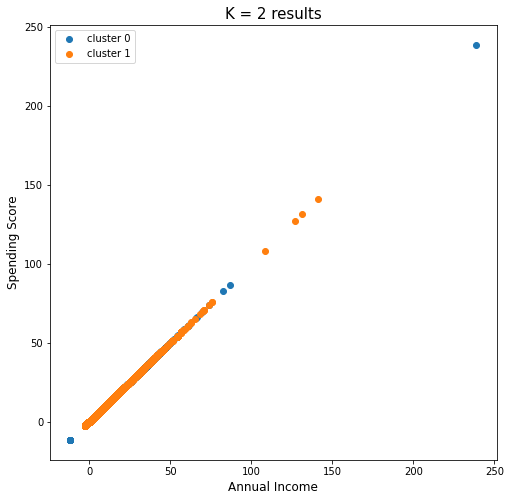

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(data2.loc[data1['cluster'] == i], data2.loc[data1['cluster'] == i], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()